# SSD : Single Shot Multibox Detector
https://taeu.github.io/paper/deeplearning-paper-ssd/

# Object Detection의 성능 평가 지표

https://seongkyun.github.io/study/2019/01/15/map/

## mAP : mean Average Precision

- 실제 Object가 Detected 된 재현율(Recall)의 변화에 따른 정밀도(Precision)의 값을 평균한 성능 수치
- AP는 1개의 Object에 대한 성능수치
- mAP 는 여러개의 Object들의 AP를 평균한 값


- Precision-Recall Curve : 재현율의 변화에 따른 정밀도의 변화 곡선
- Average Precision :  Precision-Recall Curve의 내부 면적

- IOU Threshold : 예측에 사용할 기준 IOU값 임계치
- Confidence Threshold : 기준 신뢰도, 예측 정확도의 임계치   
- NMS : Non Max Supressed <br>
  Detected 된 Object의 Bounding box중에 비슷한 위치에있는 box를 제거하고 가장 적합한 Box를 선택하는 기법
  Confidence Threshold가 높을수록 IOU Threshold가 낮을수록 많은 Box가 제거된다
  
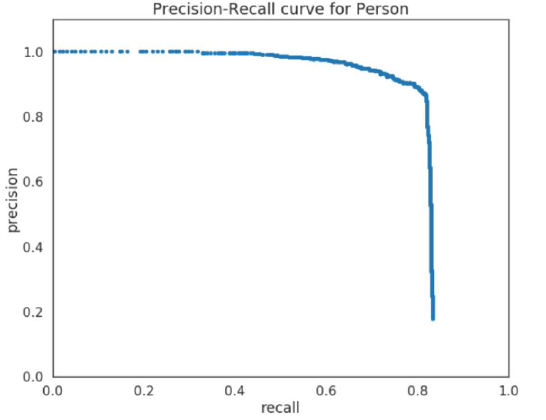

- Object Detection에서 TP,FP,FN
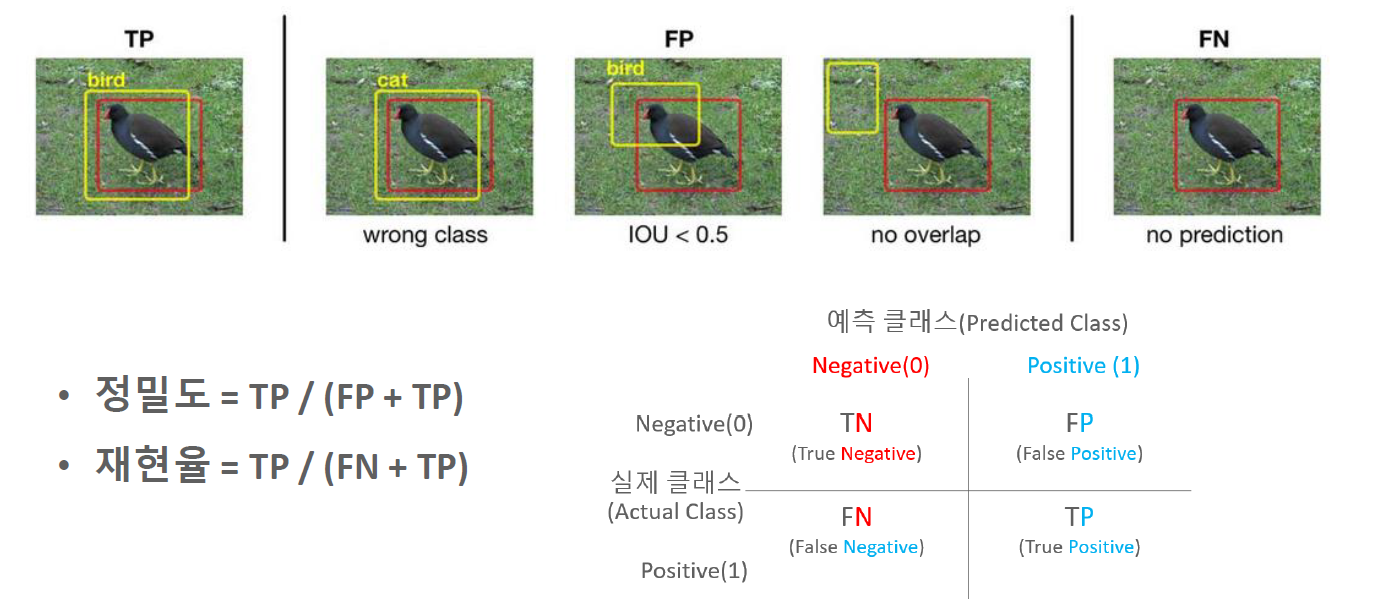

- Confidence Threshold가 낮을수록  Bounding Box는 증가 , 정밀도는 감소(FP증가), 재현율은 증가(FN감소)
- Confidence Threshold가 높을수록  Bounding Box는 감소 , 정밀도는 증가(FP감소), 재현율은 감소(FN증가)
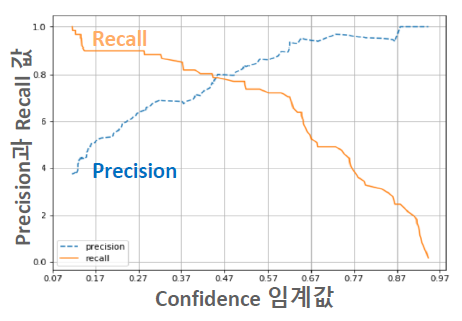

- Confidence에 따른 Precision과 Recall의 변화
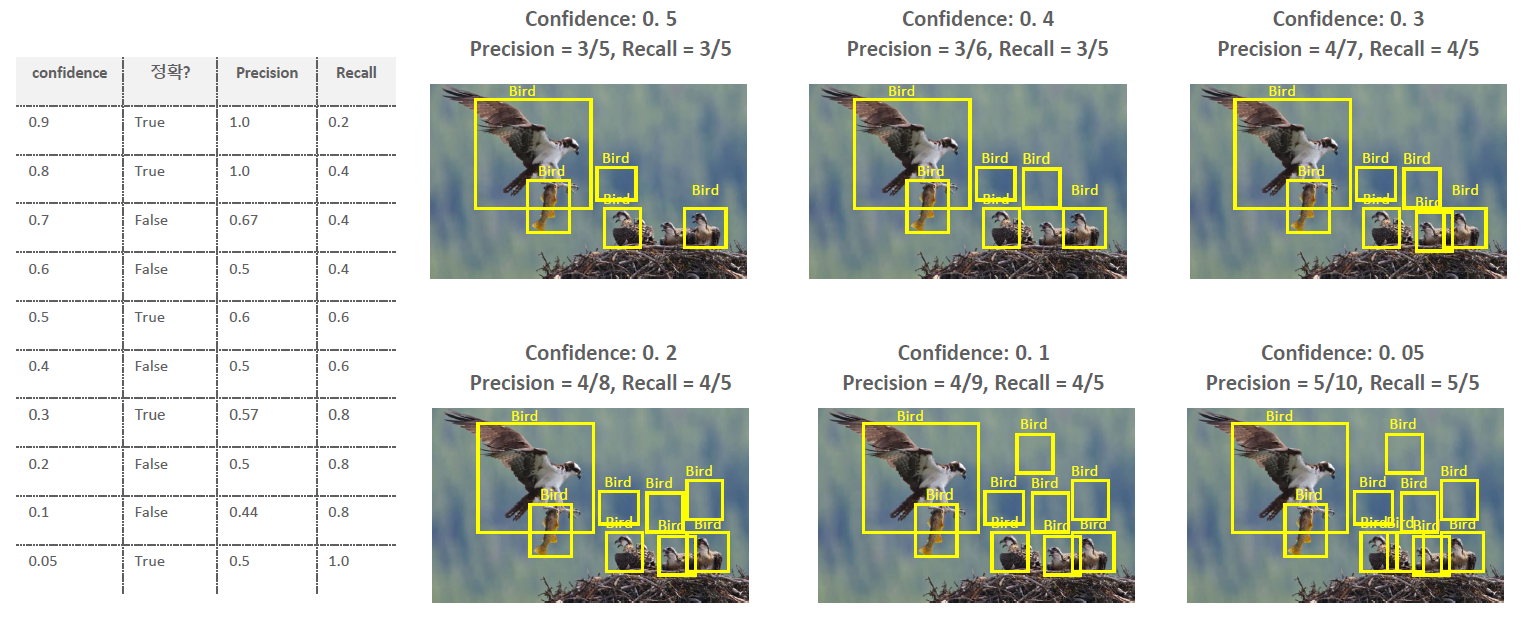

###  AP (Average Precision)  
- 파란선 : Precision-Recall Curve
- 빨간선 : AP 계산을 위해 Precision-Recall Curve에서 오른쪽 최대 Precision값으로 연결하여 다시 그린 것
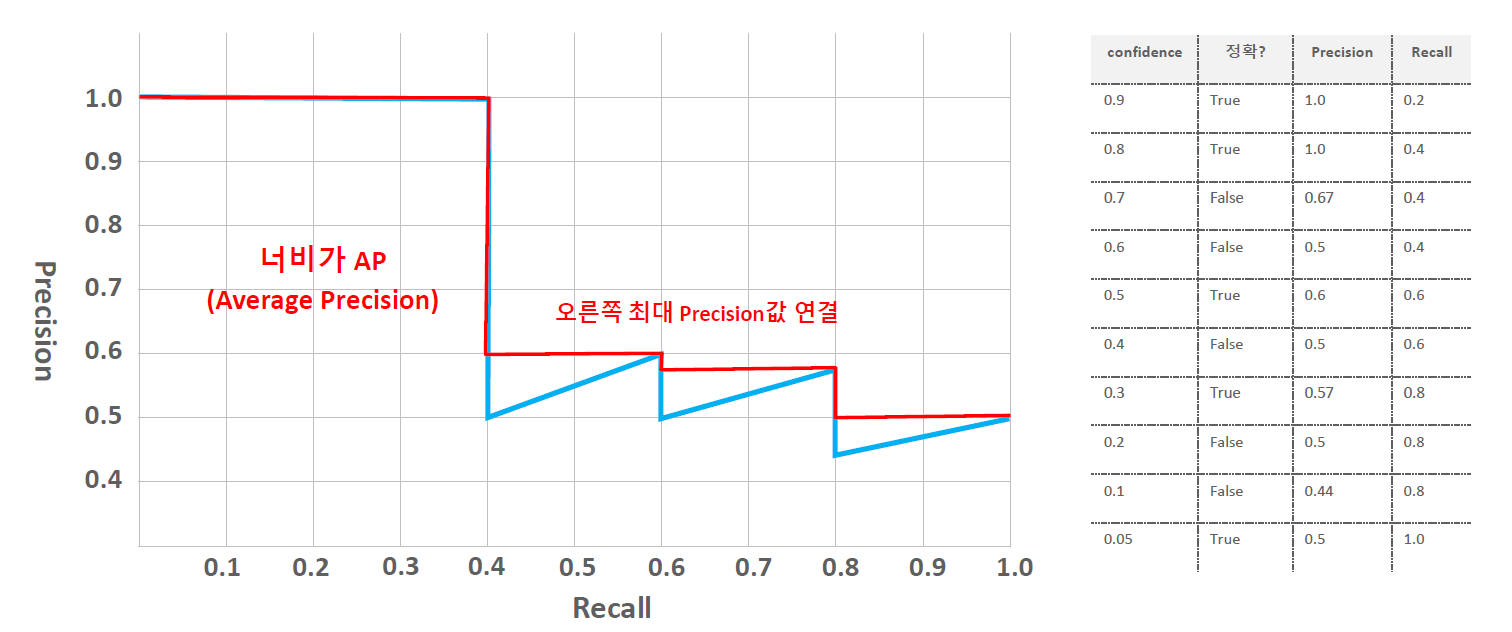

###  AP (Average Precision) 계산하기  :  한 개의 Object에 대한 값만 계산
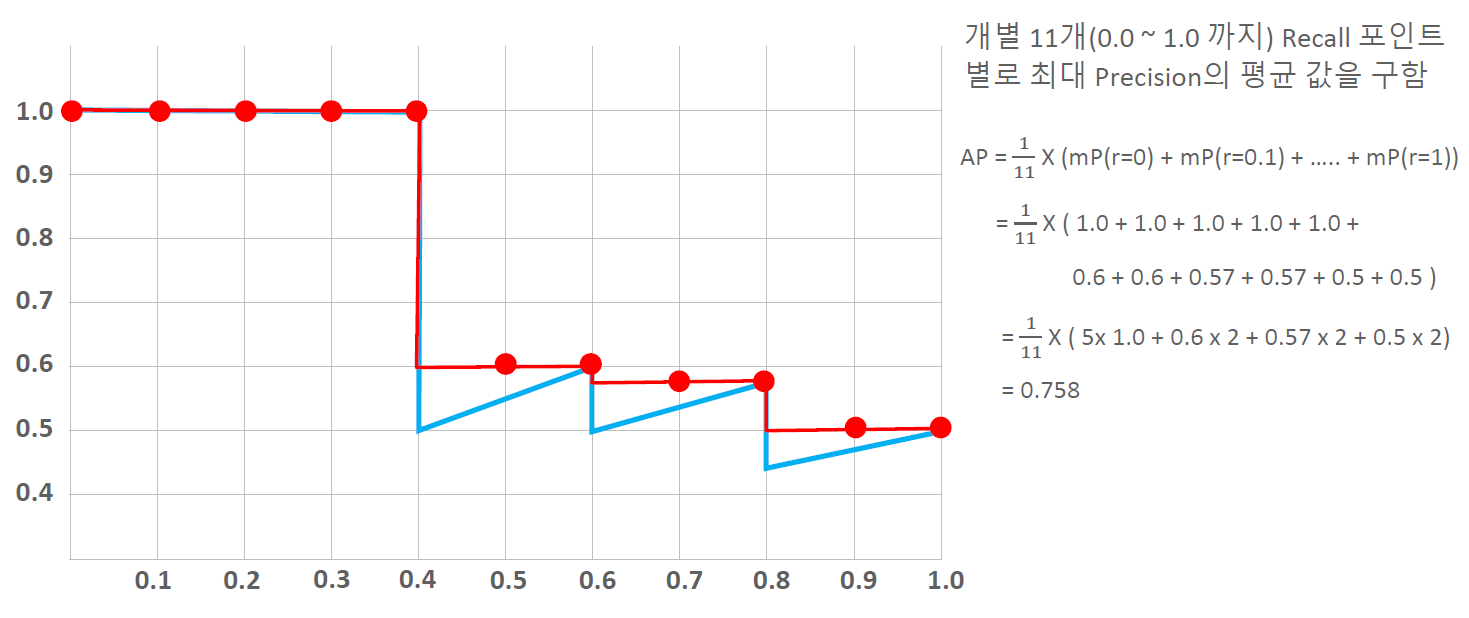
- mAP 는 여러개의 Object들의 AP를 합해서 평균을 구한 값

### PASCAL VOC Challenge에서의 AP(Average Precision)
PACAL VOC Challenge의 경우, 모델의 예측과 ground truth의 IoU가 0.5보다 크면() 모델의 예측이 올바르게 되었다고 판단
PASCAL VOC의 mAP는 위의 AP 계산 방법과 동일, FPS는 Frame Per Second로 처리 속도, Faster R-CNN의 최대 속도는 7 FPS
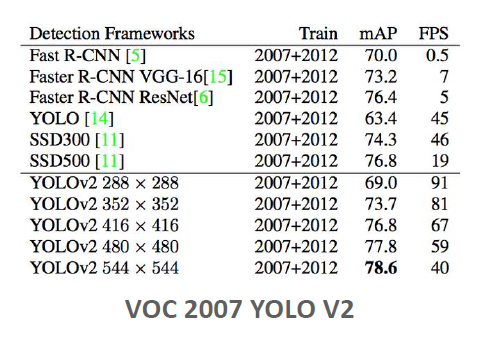

### MS COCO 데이터셋의  mAP
MS COCO는 PASCAL VOC의 단일 IOU값 계산과는 다르게() 다양한 IOU에 대한 평균값을 계산 <br>
MS COCO competition의 경우 AP는 80개의 카테고리에서 10개 이상의 IoU에 대한 평균값으로 경쟁. <br>
AP@[.50:.05:.95]: 시작 IOU를 0.50에서 0.95까지 단계 크기 0.05씩 커지며 계산 <br>
또한 Object의 크기의 유형(S/M/L)에 따른 mAP도 측정 <br>
다음은 YOLO V3 object detector의 MS COCO 에 대한 mAP 실험 결과임
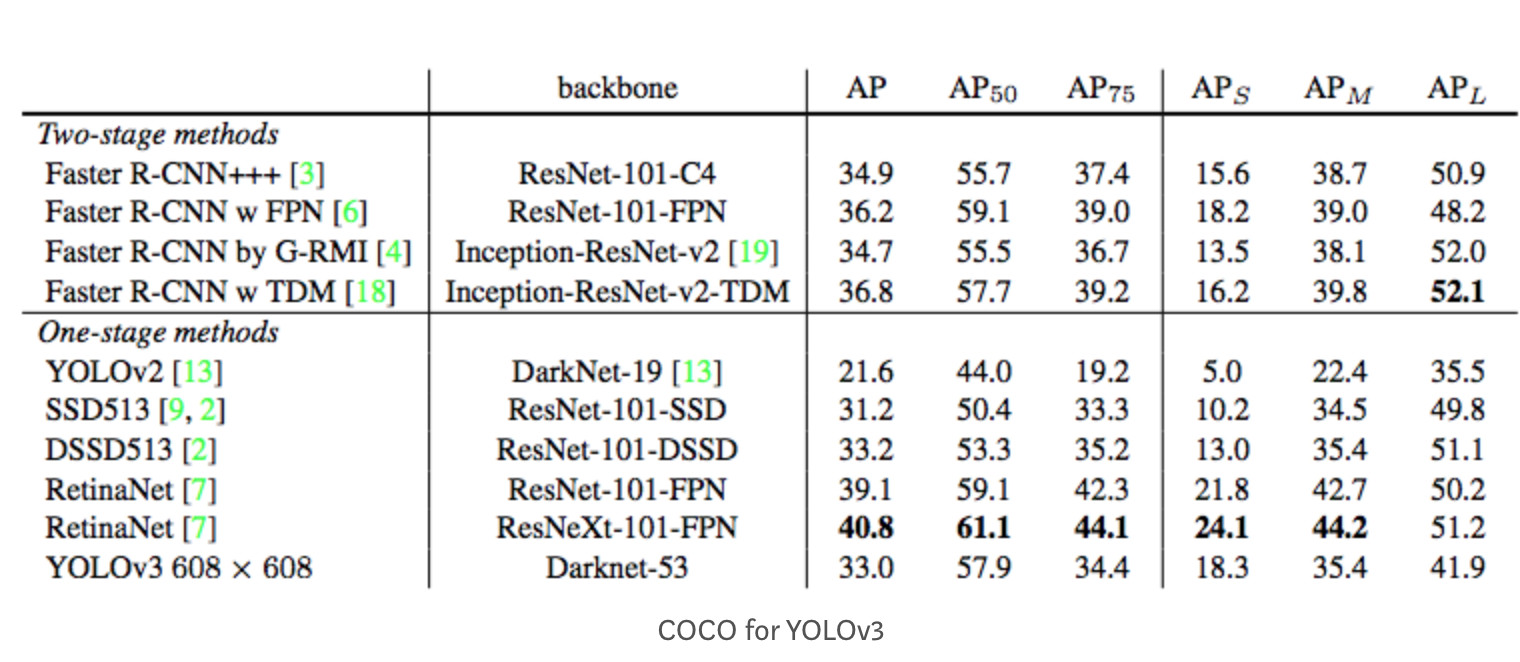


## SSD : Single Shot Multibox Detector

https://taeu.github.io/paper/deeplearning-paper-ssd/

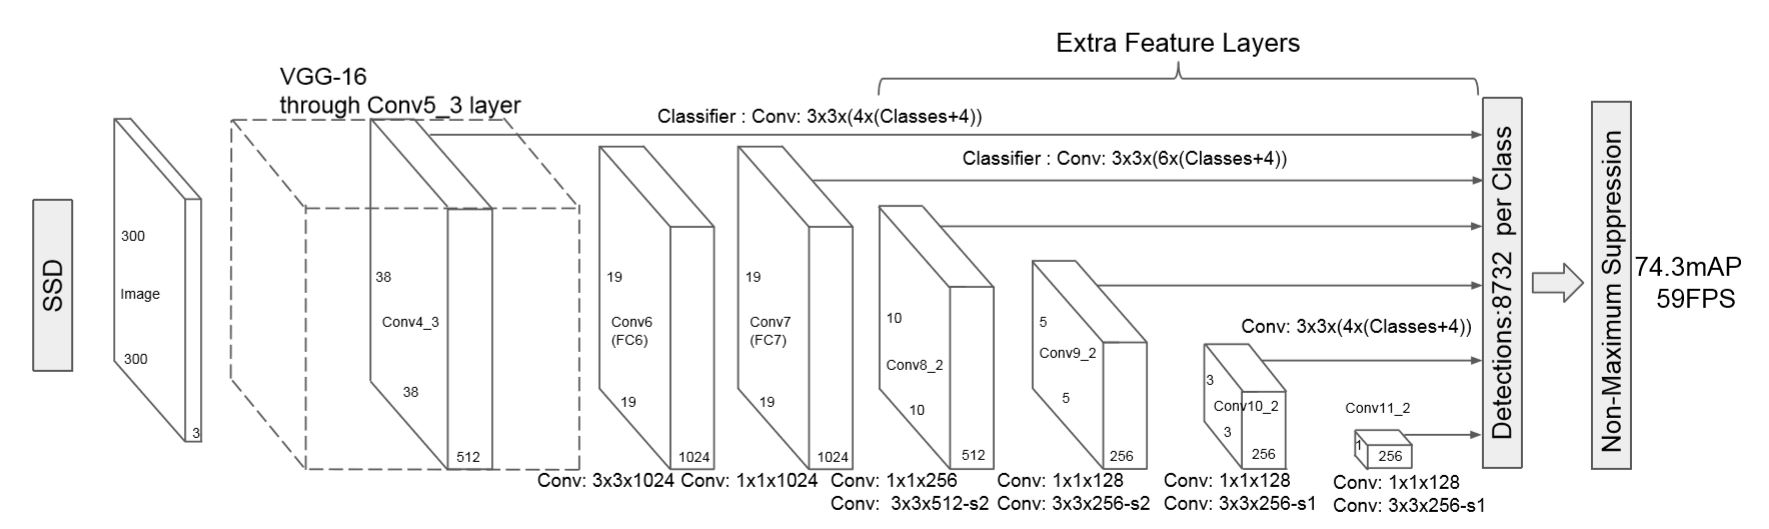

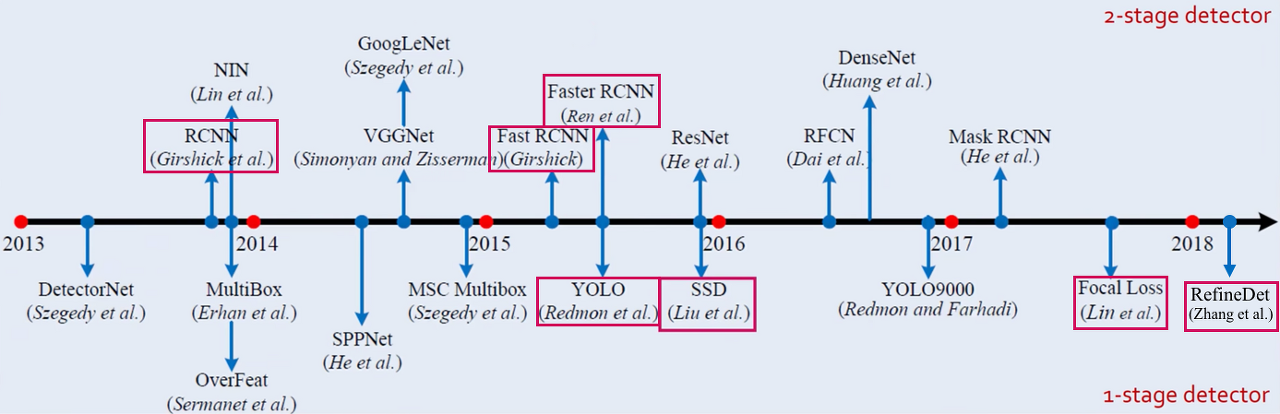

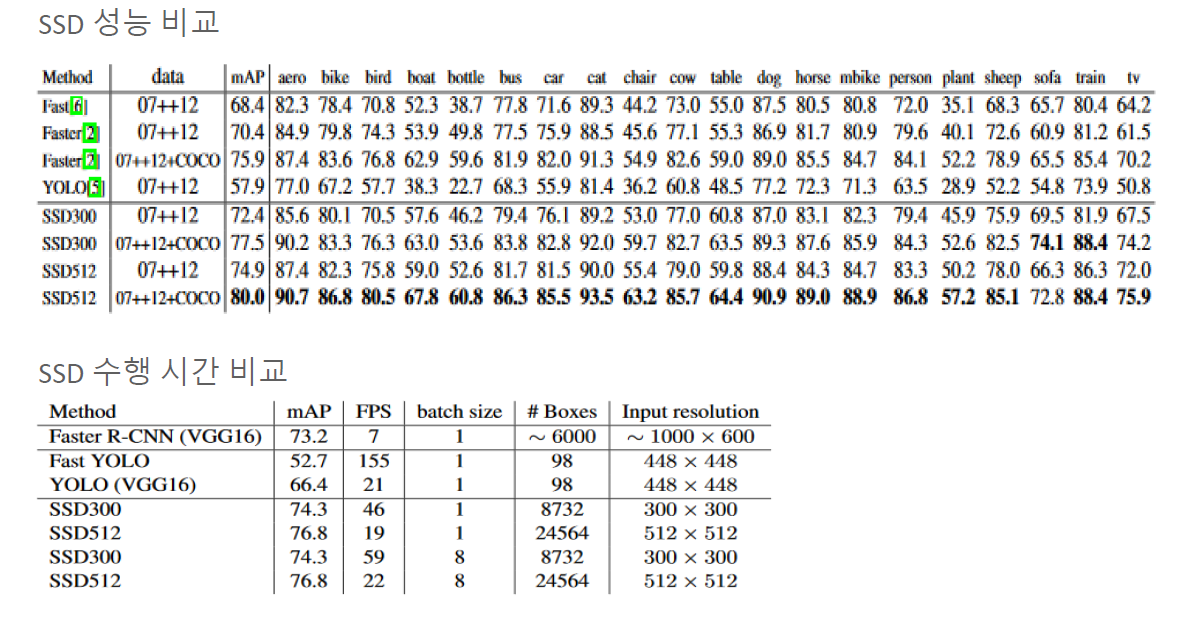

### OpenCV DNN 패키지를 이용하여 SSD 기반 Object Detection 수행

(633, 806, 3)


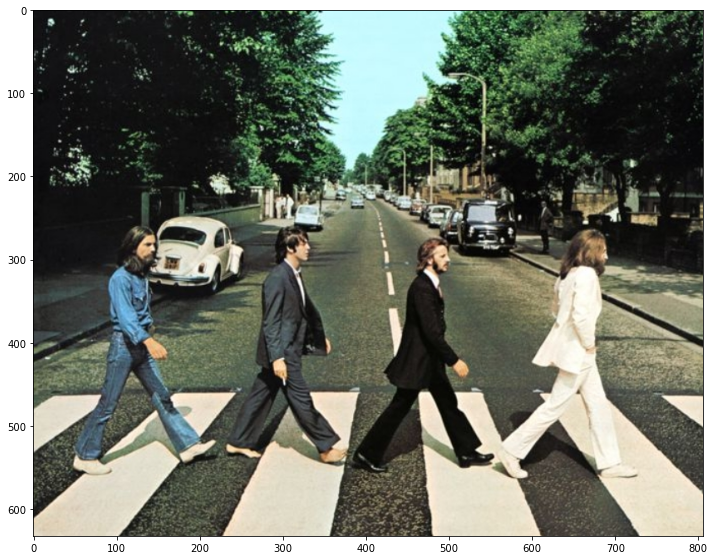

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('beatles01.jpg')
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

print(img.shape)
plt.figure(figsize=(12,12))
plt.imshow(img_rgb)
plt.show()

#### Tensorflow에서 Pretrained 된 Inference모델(Frozen graph)와 환경파일을 다운로드 받은 후 이를 이용해 OpenCV에서 Inference 모델 생성
* https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API 에 다운로드 URL 있음.
* pretrained 모델은 http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2017_11_17.tar.gz 에서 다운로드 후 압축 해제
* pretrained 모델을 위한 환경 파일은 https://github.com/opencv/opencv_extra/blob/master/testdata/dnn/ssd_inception_v2_coco_2017_11_17.pbtxt 에서 다운로드 
* download된 모델 파일과 config 파일을 인자로 하여 inference 모델을 DNN에서 로딩함. 

In [2]:
# Tensorflow Inception SSD 모델 로딩
cv_net = cv2.dnn.readNetFromTensorflow('./pretrained/ssd_inception_v2_coco_2017_11_17/frozen_inference_graph.pb', 
                                     './pretrained/ssd_inception_v2_coco_2017_11_17/graph.pbtxt')

### coco 데이터 세트의 클래스id별 클래스명 지정.

In [3]:
# Tensorflow SSD모델
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}


(1, 1, 100, 7)
person: 0.9696
person: 0.9660
person: 0.8916
person: 0.6298
car: 0.8609
car: 0.7223
car: 0.7184
car: 0.7095
car: 0.5949
car: 0.5511


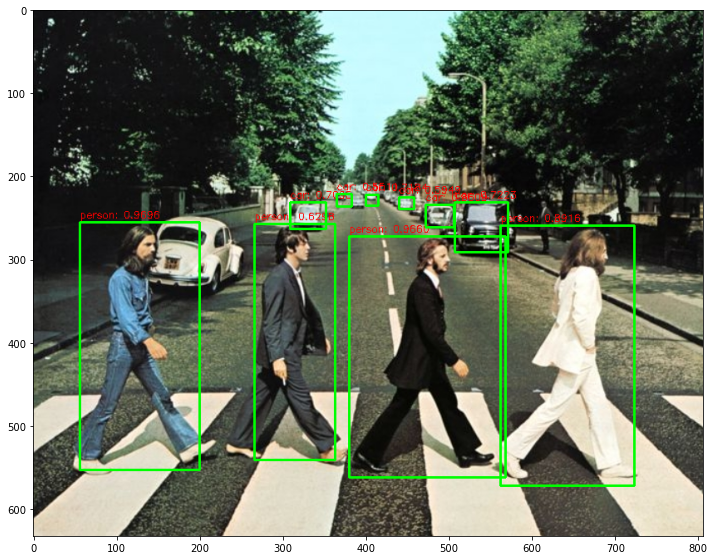

In [7]:
# 원본 이미지 (633, 806)를 네트웍에 입력시에는 (300, 300)로 resize 함. 
# 이후 결과가 출력되면 resize된 이미지 기반으로 bounding box 위치가 예측 되므로 이를 다시 원복하기 위해 원본 이미지 shape정보 필요

rows = img.shape[0]
cols = img.shape[1]
# cv2의 rectangle()은 인자로 들어온 이미지 배열에 직접 사각형을 업데이트 하므로 그림 표현을 위한 별도의 이미지 배열 생성. 
draw_img = img.copy()

# 원본 이미지 배열 BGR을 RGB로 변환하여 배열 입력. Tensorflow Faster RCNN은 size를 고정할 필요가 없는 것으로 추정. 
cv_net.setInput(cv2.dnn.blobFromImage(img, size=(300,300), swapRB=True, crop=False))

# Object Detection 수행하여 결과를 cvOut으로 반환 
cv_out = cv_net.forward()
print(cv_out.shape)  # (1, 1, 100:detect한 object갯수 , 7 : ,id,score, 좌표 4개)

# bounding box의 테두리와 caption 글자색 지정
green_color=(0, 255, 0)
red_color=(0, 0, 255)

# detected 된 object들을 iteration 하면서 정보 추출
for detection in cv_out[0,0,:,:]:  # 100회 반복
    score = float(detection[2])
    class_id = int(detection[1])
    # detected된 object들의 score(IOU)가 0.5 이상만 추출
    if score > 0.5:
        # detected된 object들은 scale된 기준으로 예측되었으므로 다시 원본 이미지 비율로 계산
        left = detection[3] * cols
        top = detection[4] * rows
        right = detection[5] * cols
        bottom = detection[6] * rows
        # labels_to_names 딕셔너리로 class_id값을 클래스명으로 변경.
        caption = "{}: {:.4f}".format(labels_to_names[class_id], score)
        print(caption)
        #cv2.rectangle()은 인자로 들어온 draw_img에 사각형을 그림. 위치 인자는 반드시 정수형.
        cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
        cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)    

#### 단일 이미지의 object detection을 함수로 생성

In [16]:
import time

def get_detected_img(cv_net, img_array, score_threshold, use_copied_array=True, is_print=True):
    
    rows = img_array.shape[0]
    cols = img_array.shape[1]
    
    draw_img = None
    if use_copied_array:
        draw_img = img_array.copy()
    else:
        draw_img = img_array
    
    cv_net.setInput(cv2.dnn.blobFromImage(img_array, size=(300,300), swapRB=True, crop=False))
    
    start = time.time()
    cv_out = cv_net.forward()
    
    green_color=(0, 255, 0)
    red_color=(0, 0, 255)

    # detected 된 object들을 iteration 하면서 정보 추출
    for detection in cv_out[0,0,:,:]:
        score = float(detection[2])
        class_id = int(detection[1])
        # detected된 object들의 score가 함수 인자로 들어온 score_threshold 이상만 추출
        if score > score_threshold:
            # detected된 object들은 scale된 기준으로 예측되었으므로 다시 원본 이미지 비율로 계산
            left = detection[3] * cols
            top = detection[4] * rows
            right = detection[5] * cols
            bottom = detection[6] * rows
            # labels_to_names 딕셔너리로 class_id값을 클래스명으로 변경. opencv에서는 class_id + 1로 매핑해야함.
            caption = "{}: {:.4f}".format(labels_to_names[class_id], score)
            # print(caption)
            #cv2.rectangle()은 인자로 들어온 draw_img에 사각형을 그림. 위치 인자는 반드시 정수형.
            cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
            cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color, 1)
    if is_print:
        print('Detection 수행시간:',round(time.time() - start, 2),"초")

    return draw_img

(633, 806, 3)
person: 0.9696
person: 0.9660
person: 0.8916
person: 0.6298
car: 0.8609
car: 0.7223
car: 0.7184
car: 0.7095
car: 0.5949
car: 0.5511
Detection 수행시간: 0.11 초


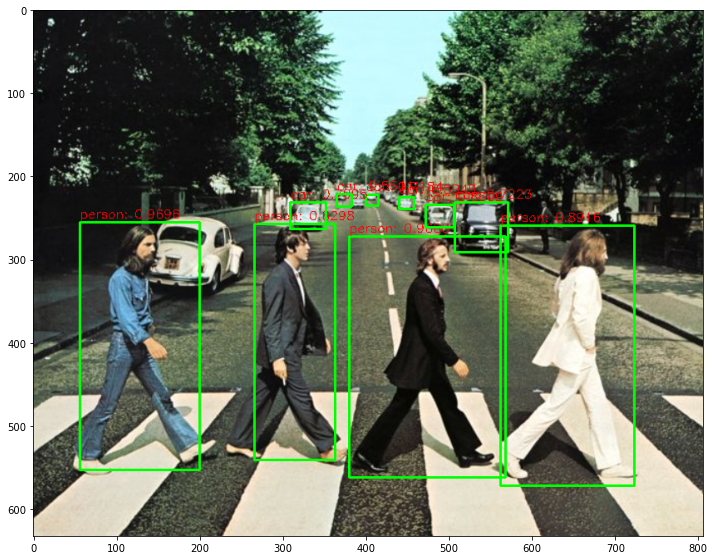

In [11]:
# image 읽기
img = cv2.imread('beatles01.jpg')
print(img.shape)   # (633, 806, 3)

cv_net = cv2.dnn.readNetFromTensorflow('./pretrained/ssd_inception_v2_coco_2017_11_17/frozen_inference_graph.pb', 
                                     './pretrained/ssd_inception_v2_coco_2017_11_17/graph.pbtxt')
# Object Detetion 수행 
draw_img = get_detected_img(cv_net, img, score_threshold=0.4)

img_rgb = cv2.cvtColor(draw_img,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,12))
plt.imshow(img_rgb)

### Video Object Detection 수행

#### 원본 영상 보기

In [12]:
from IPython.display import clear_output, Image, display, Video, HTML
Video('John_Wick_small.mp4')

#### video detection 전용 함수 생성. 

In [17]:
def do_detected_video(cv_net, input_path, output_path, score_threshold, is_print):
    
    cap = cv2.VideoCapture(input_path)

    codec = cv2.VideoWriter_fourcc(*'XVID')

    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size) 

    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt)

    green_color=(0, 255, 0)
    red_color=(0, 0, 255)
    while True:
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break
        
        img_frame = get_detected_img(cv_net, img_frame, score_threshold=score_threshold, use_copied_array=False, is_print=is_print)
        cv2.imshow("detected_image", img_frame)
        vid_writer.write(img_frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # end of while loop
    
    cv2.destroyAllWindows()
    
    vid_writer.release()
    cap.release()            

In [18]:
do_detected_video(cv_net,'John_Wick_small.mp4','John_Wick_small_ssd01_out.avi',0.4,True)

총 Frame 갯수: 58
Detection 수행시간: 0.13 초
Detection 수행시간: 0.14 초
Detection 수행시간: 0.15 초
Detection 수행시간: 0.11 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.14 초
Detection 수행시간: 0.15 초
Detection 수행시간: 0.16 초
Detection 수행시간: 0.16 초
Detection 수행시간: 0.18 초
Detection 수행시간: 0.15 초
Detection 수행시간: 0.16 초
Detection 수행시간: 0.14 초
Detection 수행시간: 0.17 초
Detection 수행시간: 0.17 초
Detection 수행시간: 0.17 초
Detection 수행시간: 0.16 초
Detection 수행시간: 0.16 초
Detection 수행시간: 0.13 초
Detection 수행시간: 0.17 초
Detection 수행시간: 0.16 초
Detection 수행시간: 0.15 초
Detection 수행시간: 0.15 초
Detection 수행시간: 0.19 초
Detection 수행시간: 0.19 초
Detection 수행시간: 0.18 초
Detection 수행시간: 0.18 초
Detection 수행시간: 0.17 초
Detection 수행시간: 0.16 초
Detection 수행시간: 0.19 초
Detection 수행시간: 0.18 초
Detection 수행시간: 0.15 초
Detection 수행시간: 0.16 초
Detection 수행시간: 0.15 초
Detection 수행시간: 0.15 초
Detection 수행시간: 0.14 초
Detection 수행시간: 0.17 초
Detection 수행시간: 0.15 초
Detection 수행시간: 0.17 초
Detection 수행시간: 0.12 초
Detection 수행시간: 0.13 초

### SSD+Mobilenet으로 Object Detection 수행.  : 속도가 좀더 빠름
* https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API 에 다운로드 URL 있음. 
* weight파일은 http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz 에서 다운로드
* 환경 파일은
https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/ssd_mobilenet_v2_coco_2018_03_29.pbtxt

In [19]:
# Tensorflow SSD+Mobilenet 모델 로딩
cv_net = cv2.dnn.readNetFromTensorflow('./pretrained/ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb', 
                                     './pretrained/ssd_mobilenet_v2_coco_2018_03_29/graph.pbtxt')

In [20]:
# 영상 detection
do_detected_video(cv_net,'John_Wick_small.mp4','John_Wick_small_ssd_mobilnet01_out.avi',0.4,True)

총 Frame 갯수: 58
Detection 수행시간: 0.12 초
Detection 수행시간: 0.13 초
Detection 수행시간: 0.11 초
Detection 수행시간: 0.07 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.07 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.07 초
Detection 수행시간: 0.06 초
Detection 수행시간: 0.07 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.07 초
Detection 수행시간: 0.06 초
Detection 수행시간: 0.07 초
Detection 수행시간: 0.07 초
Detection 수행시간: 0.07 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.07 초
Detection 수행시간: 0.07 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.07 초
Detection 수행시간: 0.07 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.07 초
Detection 수행시간: 0.06 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.07 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.06 초
Detection 수행시간: 0.07 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.1 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.07 초
Detection 수행시간: 0.07 초
Detection 수행시간: 0.07 초
Detection 수행시간: 0.08 초
Detection 수행시간: 0.09 초
Detection 수행시간: 0.07 초
Detection 수행시간: 0.07 